# Exercise 1

1) The bigcity.csv dataset contains the population of 49 American cities in 1920 (u) and in 1930 (x). Let’s assume that cities are a random sample and that we are observing the couple (U, X), the parameter that we want to estimate is theta = E(X)/E(U), where E(.) is the expected value operator.

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
address = r"C:\Users\garde\Desktop\Github\data\bigcity.csv"
bigcity = pd.read_csv(address, index_col=0)
bigcity.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


1.1) Propose an estimator for theta

In [4]:
# we have x/u for all observations -> let's use the sample mean as an estimator
# Sample: mean(x)/mean(u) -> Population: E(x)/E(u)
# Beware: theta = E(x)/E(u) != E(x/u)

theta_sample_avg = bigcity["x"].mean() / bigcity["u"].mean()
print(theta_sample_avg)

1.2390185991294025


1.2) Estimate with the bootstrap the bias and the standard error of the estimate of the previous point

In [5]:
# draw with reposition: n columns of 49 replications (draws with repos) for x and u
n1 = 10**6
x_rep = np.random.choice(bigcity["x"], size=49*n1).reshape(49,n1).mean(axis=0)
u_rep = np.random.choice(bigcity["u"], size=49*n1).reshape(49,n1).mean(axis=0)
xu_boot = x_rep/u_rep

theta_boot_avg = xu_boot.mean()
theta_boot_std = np.std(xu_boot,ddof=1) # you lose 1 dof for sample mean

print("Bias = {:.5f}\nStdv = {:.5f}".format(theta_sample_avg - theta_boot_avg, theta_boot_std))

Bias = -0.02577
Stdv = 0.25312


1.3) Get a bootstrap confidence interval for theta, 0.90 confidence level

In [6]:
# choose the confidence interval with perc
perc = .90

lower_band = (1-perc)/2*100
higher_band = 100-lower_band

lower_band = np.percentile(xu_boot,lower_band)
higher_band = np.percentile(xu_boot,higher_band)

print("Confidence Interval {:.0%}: [{:.5f},{:.5f}]".format(perc,lower_band,higher_band))

Confidence Interval 90%: [0.89708,1.71956]


## 2) Consider the Weibull distribution.

2.1) Use the Inverse Transform Method to generate pseudo-random values from this distribution,
given alpha and mu.

In [7]:
#inverse weibull function
def inverseWeibull(n, mu, alpha): 
    u = stats.uniform.rvs(size = n, loc = 0, scale = 1)
    y = 1 - np.exp(- (u / mu) ** alpha)
    x = mu * (- np.log(1 - y)) ** (1 / alpha)
    return x

#setting up mu, alpha & size
mu = 8
alpha = 4
n = 10**4

#collecting values
pseudo_rand_values = []
pseudo_rand_values.append(inverseWeibull(n, mu, alpha))

2.2) Plot the results, comparing them with the theoretical distribution of a Weibull

(array([ 974.,  965., 1013.,  976., 1047., 1005., 1019., 1002., 1045.,
         954.]),
 array([0.        , 0.09999349, 0.19998697, 0.29998046, 0.39997394,
        0.49996743, 0.59996092, 0.6999544 , 0.79994789, 0.89994138,
        0.99993486]),
 <a list of 10 Patch objects>)

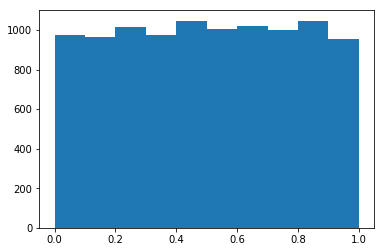

In [8]:
#plot the results
plt.hist(pseudo_rand_values)

# Exercise 3

3) Using what already did during the Lecture 6, generalize the EM algorithm in order to estimate also the standard deviations of the two Normal densities of the mixture.

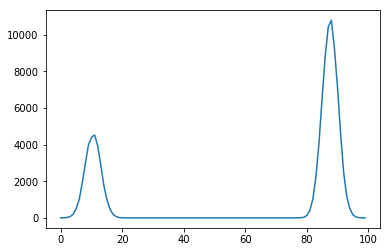

In [9]:
# Generate data 
n3 = 10**5
share1 = 0.3
stdev = 0.1

sample1 = np.random.normal(0, stdev, size = int(n3*share1))
sample2 = np.random.normal(3, stdev, size = int(n3*(1-share1)))
sample = np.concatenate([sample1, sample2])

hist, bin_edges = np.histogram(sample, bins=100)
plt.plot(hist)

Std1 = 0.10025
Std2 = 0.09971

mu1 = 0.00033
mu2 = 2.99993
pi_1 = 0.30000
pi_2 = 0.85081


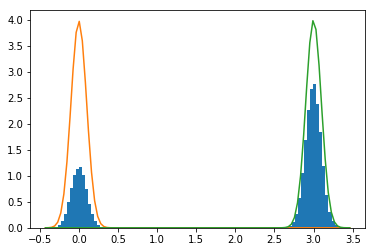

In [10]:
# initial setting
mu1, mu2, pi_1, p_2 = np.array([-1, 1, 0.5, 0.5])
params = np.array([-1, 1, 0.5, 0.5])

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)
tol = 0.1

# maxium iterations = 100
for i in range(100):
    
    # Expectation step 
    cdf1 = stats.norm(mu1,0.1).pdf(sample)
    cdf2 = stats.norm(mu2,0.1).pdf(sample)
    
    # Why here? / what should be the final value (0.7 or 0.85)?
    pi_2 = 1 - pi_1
    
    # Why label?
    plabel1 = cdf1 * pi_1 / (cdf1 * pi_1 + cdf2 * pi_2)
    plabel2 = cdf2 * pi_2 / (cdf1 * pi_1 + cdf2 * pi_2)
    
    # updating parameters 
    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    pi_1 = sum(plabel1)/len(sample)
    if (params - np.array([mu1, mu2, pi_1, pi_2])).max() < tol: break
    params = np.array([mu1, mu2, pi_1, pi_2])

# Standard Deviations
std_dev1 = np.std(sample1,ddof=1)
std_dev2 = np.std(sample2,ddof=1)
print("Std1 = {:.5f}\nStd2 = {:.5f}\n".format(std_dev1, std_dev2))

# Final Parameters
params = np.array([mu1, mu2, pi_1, pi_2])
print("mu1 = {:.5f}\nmu2 = {:.5f}\npi_1 = {:.5f}\npi_2 = {:.5f}".format(mu1, mu2, pi_1, pi_2))

# histogram
plt.hist(sample, bins = 100, density = True)
x = np.linspace(sample.min(), sample.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu1, std_dev1))
plt.plot(x, stats.norm.pdf(x, mu2, std_dev2))
plt.show()

# 4) Exercise 4

4.1) Consider the distribution of X. Implement a function to compute f(x, delta) and plot it with delta = 1.5.

In [11]:
def pdf_x(x,d):
    
    # vectorized x distribution giver
    solution = d / (x*np.sqrt(2*np.pi)) * np.cosh(d*np.log(2*x)) * np.exp(-np.sinh(d*np.log(2*x))**2/2)
    
    # x<0 -> nan: cdf(x<0) -> 0
    # infinite is replaced by largest number available
    
    return np.nan_to_num(solution)

C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cosh
  after removing the cwd from sys.path.
C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sinh
  after removing the cwd from sys.path.
C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


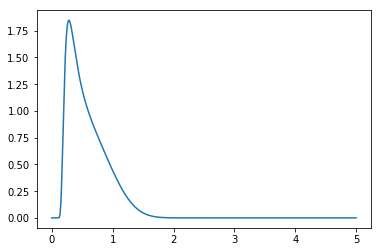

In [12]:
# values
n4 = 10**6
d = 1.5
x = np.linspace(0, 5, n4)
y_x = pdf_x(x,d)

# figure1: plot of the cdf
fig1 = plt.figure()
ax = fig1.add_subplot(111)
line1 = ax.plot(x, y_x)
plt.show()

4.2) Implement a function to simulate from X using the Acceptance Rejection sampling, using an Exponential distribution (with lambda = 1) as proposal.

In [13]:
def p(x,l):
    
    #envelope
    return l*np.exp(-l*x)

def q(x,d):
    
    #target
    return pdf_x(x,d)

def accRejSampling(l=1,d=1.5,n=1000):
    
    y = np.random.exponential(scale=1, size=n)
    u = np.random.uniform(0, 1, size=n)

    # fix this alpha
    alpha = 1 / (q(y,d)/p(y,l)).max()
    ratio = alpha * q(y,d) / p(y,l)

    return y[u < ratio]
 
# Simulation
n5 = 10000
sample4 = accRejSampling(1.5, 1, n5)
print("Acceptance: {:.0%}".format(sample4.size/n5))

Acceptance: 65%


4.3) Generate a sample using your function and, with these data, estimate E(X^2). Using the
bootstrap, give a measure of precision of your estimate.

In [14]:
# E(X^2) estimation
sample4_squared = sample4**2
print("E(X**2) = {:.5f}".format(sample4_squared.mean()))

E(X**2) = 1.12907


In [15]:
# Measure of precision -> Bootstrap
# draw with reposition: n columns of len(sample_squared) replications (draws with repos) for x and u
n6 = len(sample4_squared)
n7 = 10**4
x2_boot = np.random.choice(sample4_squared, size=n6*n7).reshape(n6,n7).mean(axis=0)

x2_boot_avg = x2_boot.mean()
x2_boot_std = np.std(x2_boot,ddof=1) # you lose 1 dof for sample mean

print("Bias = {:.5f}\nStdv = {:.5f}".format(x2_boot_avg - x2_boot_avg,x2_boot_std))

Bias = 0.00000
Stdv = 0.02058
